# Machine Learning - Practical I

Names: Friederike Becker, Stefan Pfeiffer, Timon Vogt

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of two or three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 exercise of each practical to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.
    
    

In [1]:
# %matplotlib notebook
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import stats
import copy
import pylab
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [2]:
data=pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [3]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [4]:
target_clm = 'critical_temp' # the critical temperature is our target variable
n_trainset = 200 # size of the training set
n_testset = 500 #size of the test set

In [5]:
print("This is an autosave test.")

This is an autosave test.


In [6]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx) # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):',X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):',X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

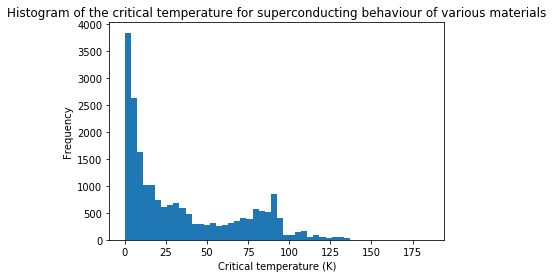

In [7]:
# Histogram of the target variable
plt.hist(y_train_full, bins=50)
plt.title("Histogram of the critical temperature for superconducting behaviour of various materials")
plt.xlabel("Critical temperature (K)")
plt.ylabel("Frequency")
plt.show()

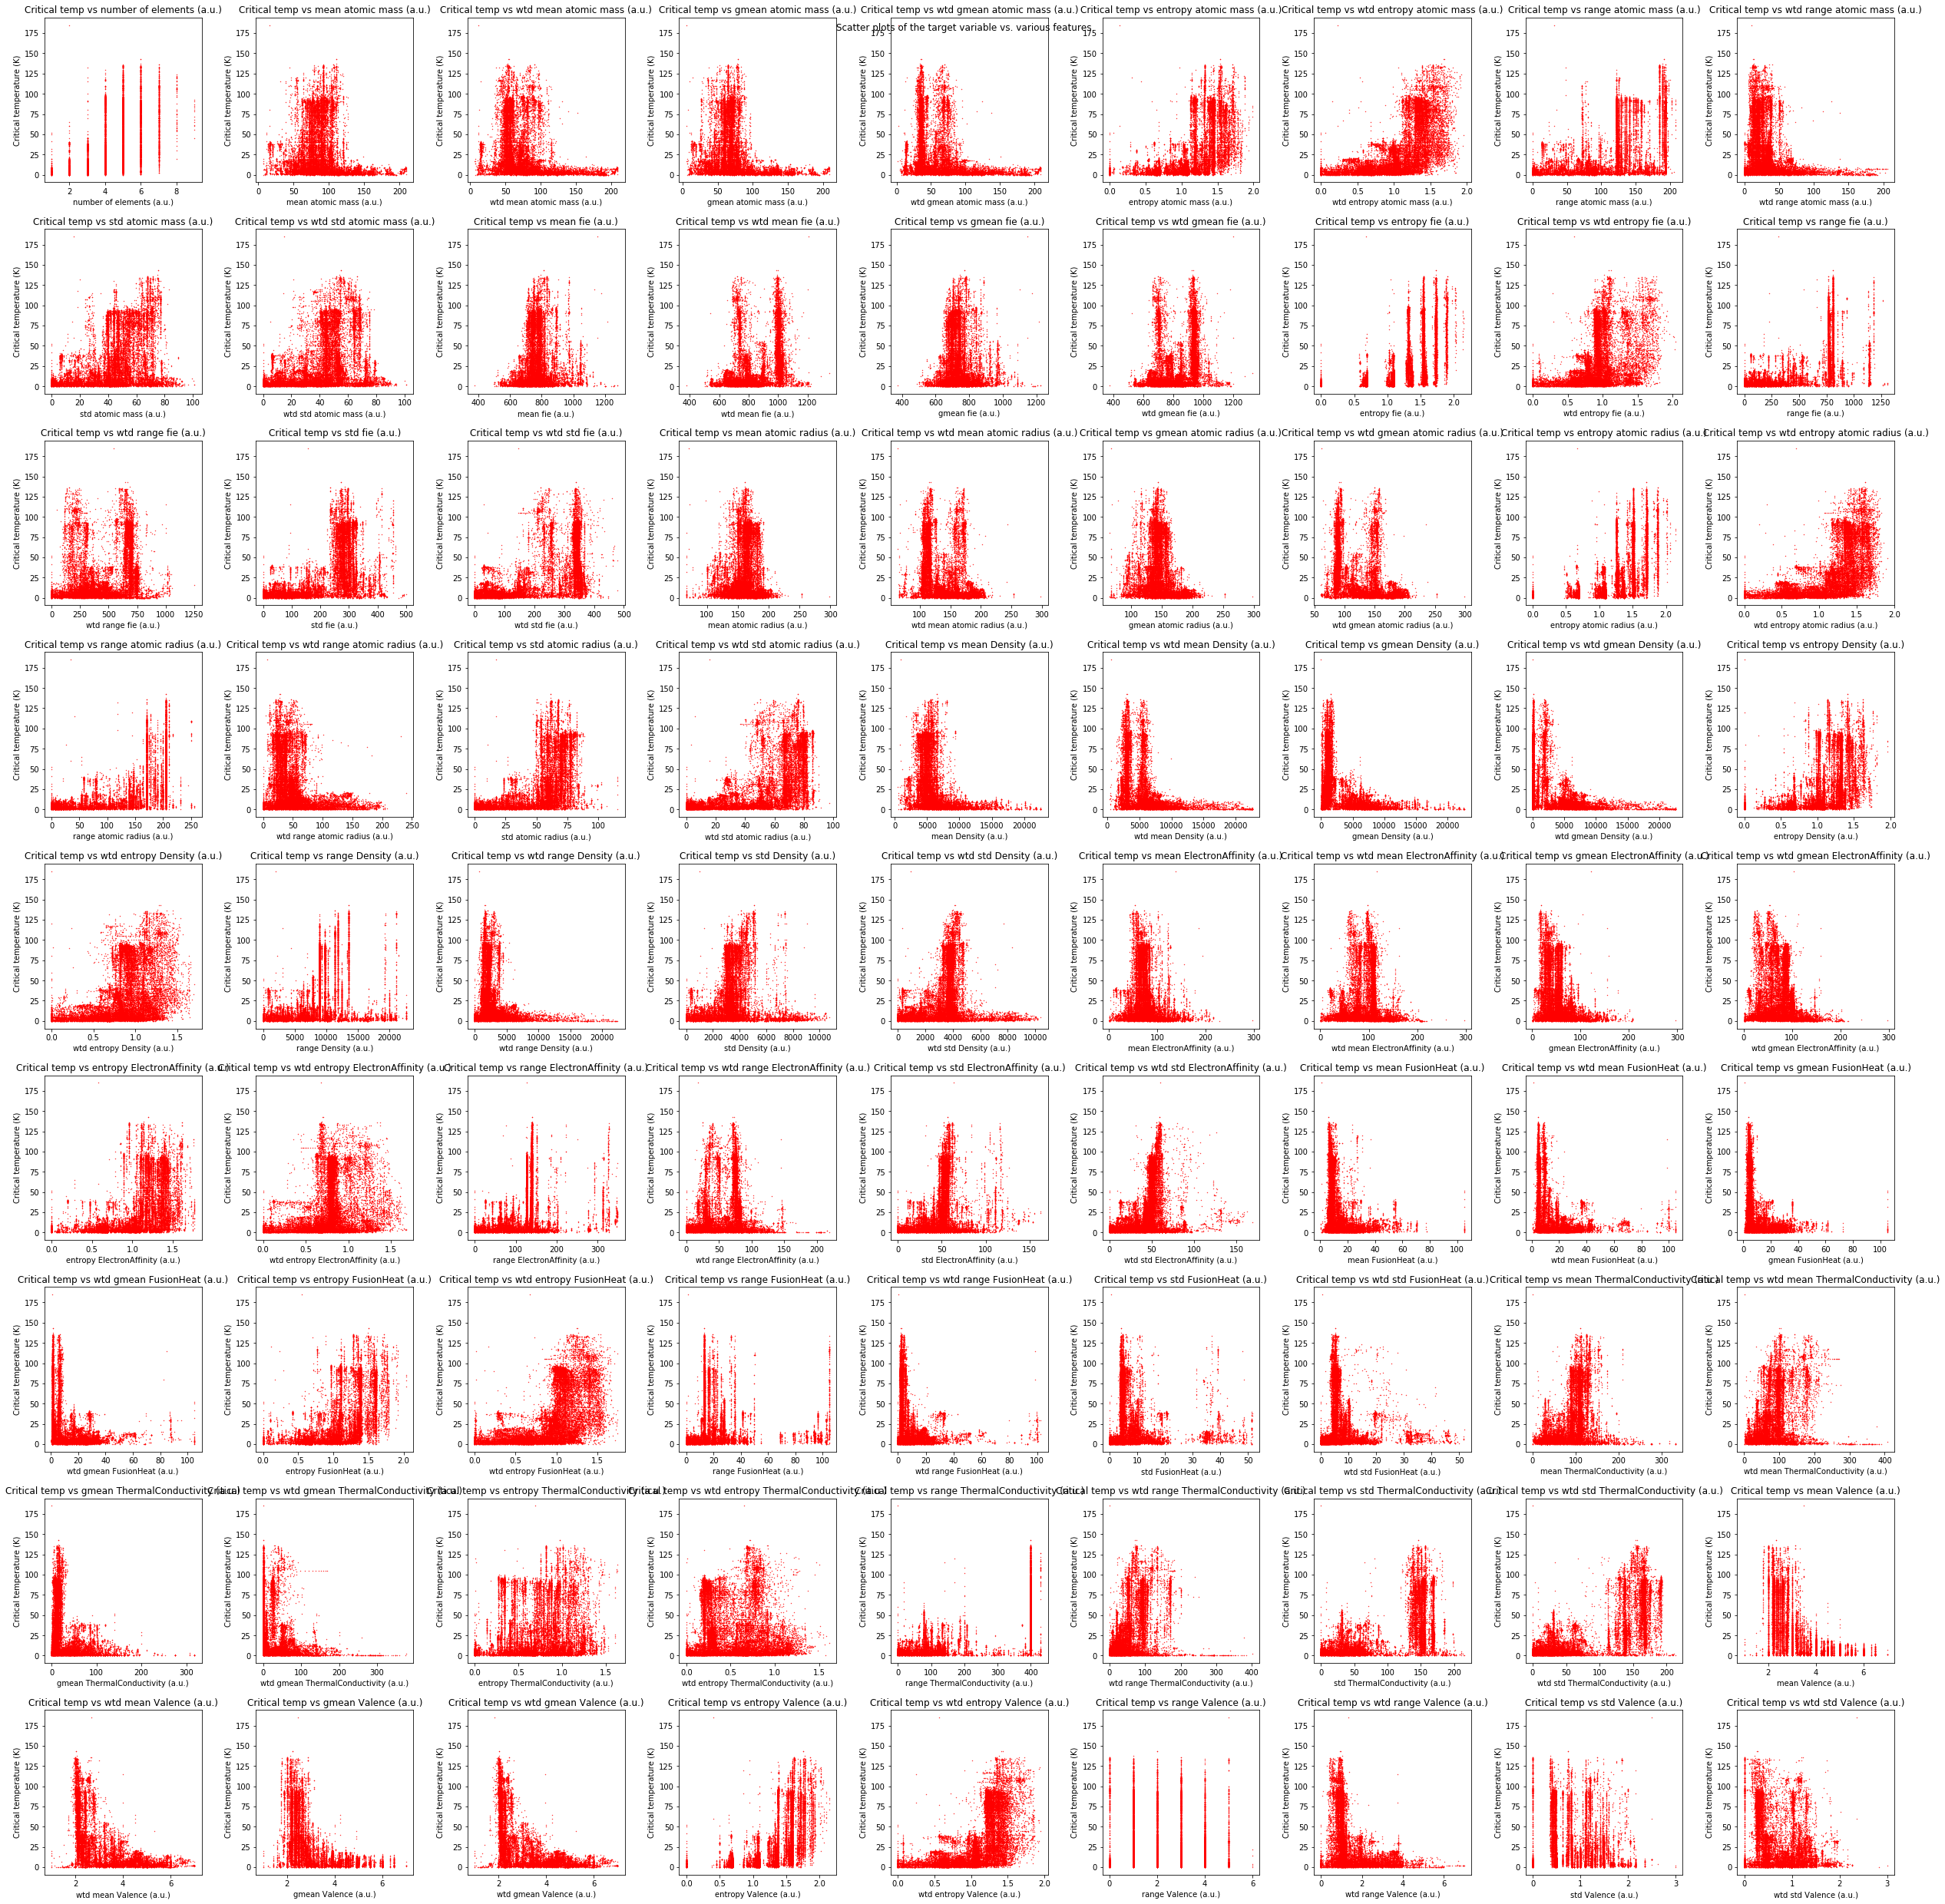

In [8]:
# Scatter plots of the target variable vs. features
fig, ax = plt.subplots(9, 9, figsize=(35, 35))
fig.suptitle("Scatter plots of the target variable vs. various features")
fig.tight_layout(pad=4.0)
for x in range(9):
    for y in range(9):
        i = x*9 + y
        ax[x, y].scatter(X_train_full[:, i], y_train_full, c="red", s=0.15)
        ax[x, y].set_title("Critical temp vs " + str(data.columns[i]).replace("_", " ") + " (a.u.)")
        ax[x, y].set_xlabel(str(data.columns[i]).replace("_", " ") + " (a.u.)")
        ax[x, y].set_ylabel("Critical temperature (K)")


Which material properties may be useful for predicting superconductivity? What other observations can you make?

When evaluating this grid, one should look for plots that show a small spread in the critical temperature for all values of the material property it is plotted against. This is because a given value of the predictor would then allow us to make a precise prediction for the outcome. Here we are however observing that for all the variables in the dataset, the critical temperature takes on a large spread for at least some values of that variable/predictor. There are however some variables for which the spread of the critical temperature is smaller at some of its values - e.g. when looking at "wtd entropy atomic radius", we can see that observations with small values of this variable tend to have smaller critical temperatures (similar relations can be stated for a lot of the variables describing the atomic radius), making it a variable with at least some predictive power. All in all though, the data show that guessing ~0K as the critical superconductivity temperature is correct a lot of times.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [9]:
def plot_regression_results(y_test,y_pred,weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram
        
    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''
    
    print('MSE: ', mean_squared_error(y_test,y_pred))
    print('r^2: ', r2_score(y_test,y_pred))
    
    fig,ax = plt.subplots(1,3,figsize=(9,3))
    #predicted vs true
    ax[0].scatter(y_test,y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    #residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error),bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    #weight histogram
    ax[2].hist(weights,bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


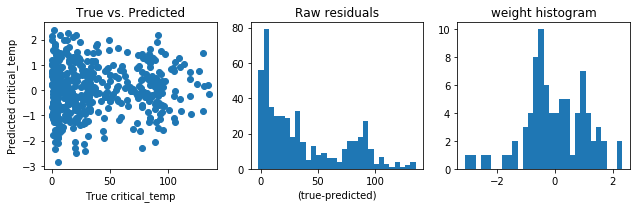

In [10]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 599.7.

In [11]:
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and 
       returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
         
       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.        
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    
    # Appending columns of ones    
    X_train = np.append(np.ones((200,1)), X_train, axis=1)
    X_test = np.append(np.ones((500,1)), X_test, axis=1)
    
    
    # Source for confirmation: https://en.wikipedia.org/wiki/Ordinary_least_squares#Estimation
    
    tmp = np.transpose(X_train).dot(X_train)
    tmp = np.linalg.inv(tmp)
    pinv = tmp.dot(np.transpose(X_train))
    
    # Matrix multiplication
    weights = pinv.dot(y_train)
    
    # Prediction by multiplication
    y_pred = X_test.dot(weights)    
    
    # ---------------- END CODE -------------------------
    
    return weights, y_pred

MSE:  599.7397625913964
r^2:  0.5211810643545935


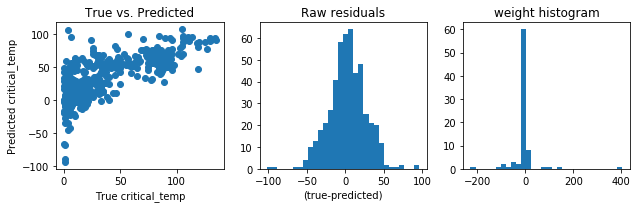

In [12]:
# Plots of the results

# HIDE THIS CELL
weights, y_pred = OLS_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

The weight histogram shows that most of the weights (or coefficients) are near zero, which is a possible indication that they have no strong linear influence on the critical temperature (this could also possibly be a scaling issue). However, there are still quite a few predictors that are assigned non-zero weights, indicating that they do have strong predictive power in the linear model. The plot of the true vs. predicted values shows an anomaly: our model is predicting values below zero, which is outside the possible range of values for the critical temperature. Furthmore, it makes very few predictions above 100, even though there are observations in the data with such a high value for the critical temperature. The linear model thus has problems making predictions for observations that have a high true value and especially for those that have a low true value. In a model with perfect predictive power, we would want all of our points to lie on a 45 degree line in this plot. When disregarding the points that have a predicted temperature below zero, we can see that quite a few of the points lie on or somewhere near this 45 degree line (even though this is hard to tell with alpha set to 1). However, the histogram of the raw residuals supports this assumption, showing that most residuals are very small. To sum up, the linear model is not perfect, but seems to be better than just random guessing.

## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [13]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and 
       returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
         
       Note:
         The sklearn library automatically takes care of adding a column for the offset.     
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    
    predictor = linear_model.LinearRegression().fit(X_train, y_train)
    weights = predictor.coef_
    y_pred = predictor.predict(X_test)
    
    # ---------------- END CODE -------------------------
    
    return weights, y_pred

MSE:  599.739762618123
r^2:  0.5211810643332555


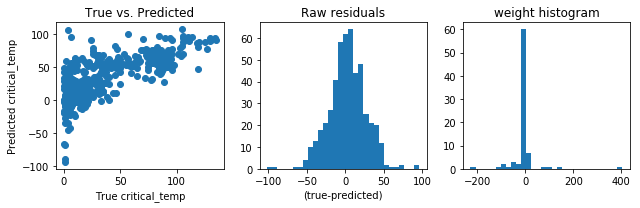

In [14]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights.T) 

If you implemented everything correctly, the MSE is again 599.74.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  329.8607010411003
r^2:  0.7366465263178581


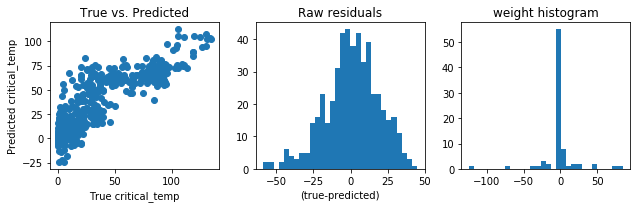

In [15]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights.T)

 How does test set performance change? What else changes?

The test set performance has improved drastically. The MSE went down to 329.9 (from 599.7). Furthmore, one can see in the true vs. predicted graph that the model seems to make far less "nonsensical" predictions below 0 and that all other points also lie more closely to the ideal 45 degree line. This observation is also supported by the histogram of the raw resiudals, which shows that most residuals have now moved closer to zero. The largest residuals are now around an absolute value of 50, as opposed to 100 before. The weight histogram shows that most weights are still near 0 and that the few large coefficients have also become smaller - this might be because in the small training data, there could have been a few outlier observations that drastically influenced the coefficients.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (XX^T + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [16]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha 
       on the training set and returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.       
    
    '''

    # ---------------- INSERT CODE ----------------------
    
    # Append 1s columns    
    X_train = np.append(np.ones((200,1)), X_train, axis=1)
    X_test = np.append(np.ones((500,1)), X_test, axis=1)
    
    # Calculate weights
    tp = np.transpose(X_train)
    tmp = tp.dot(X_train)
    tmp = np.add(tmp, alpha * np.identity(82))
    tmp = np.linalg.inv(tmp)
    p = tmp.dot(np.transpose(X_train))
    
    
    # Matrix multiplication
    weights = p.dot(y_train)
    
    # Prediction by multiplication
    y_pred = X_test.dot(weights)
    
    # ---------------- END CODE -------------------------
        
    return weights, y_pred

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [17]:
alphas = np.logspace(-7,7,100)

# ---------------- INSERT CODE ----------------------
error_list = []
weights_list = []

for a in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, a)
    error = mean_squared_error(y_test,y_pred)
    
    error_list.append(error)
    weights_list.append(weights)
    
# ---------------- END CODE -------------------------


Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

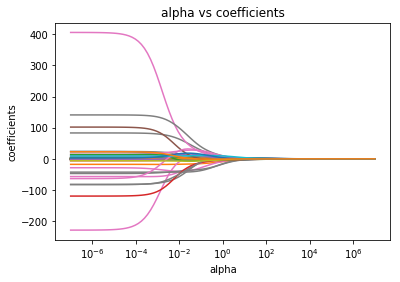

In [18]:
# Plot of coefficients vs. alphas

weights = np.array(weights_list)
for i in range(len(weights[0])):
    plt.plot(alphas, weights[:, i])
plt.xscale("log")
plt.title("alpha vs coefficients")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.show()
    

Why are the values of the weights largest on the left? Do they all change monotonically? 

The values of the weights are largest on the left because the $\alpha$ value on the left is smallest and therefore large weight values are not as heavy penalised.
Certain values do not change monotonically but go from $\lt 0$ to $\gt 0$ before converging finally to 0.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$s should be close to the test-set MSE of the unregularized solution, i.e. 599.

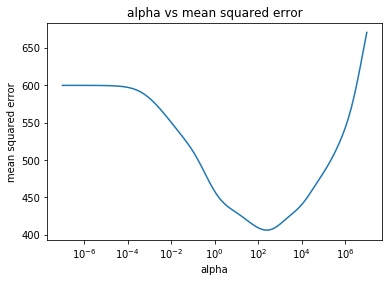

In [19]:
# Plot of MSE  vs. alphas
errors = np.array(error_list)
plt.plot(alphas, errors)
plt.xscale("log")
plt.title("alpha vs mean squared error")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.show()

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~600 on the left?

The minimum MSE is reached an $\alpha$ of around 100, where the mean squared error is around 400. Therefore it is better than the MSE of the unregularized model of around 600. The curve should reach ~600 on the left since an $\alpha$ of 0 is the same as the unregularized model.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [20]:
def ridge_regression_sklearn(X_test, X_train, y_train,alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
       Note:
         The sklearn library automatically takes care of adding a column for the offset.     
   
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    
    predictor = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
    
    weights = predictor.coef_
    y_pred = predictor.predict(X_test)
    
    
    # ---------------- END CODE -------------------------
            
    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

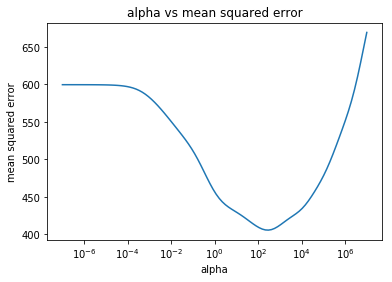

In [21]:
# Plot of MSE  vs. alphas
alphas = np.logspace(-7,7,100)
error_list = []
weights_list = []

for a in alphas:
    weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, a)
    error = mean_squared_error(y_test,y_pred)
    
    error_list.append(error)
    weights_list.append(weights)
    
errors = np.array(error_list)
plt.plot(alphas, errors)
plt.xscale("log")
plt.title("alpha vs mean squared error")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.show()

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [22]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha. 
       The function should train the linear regression model for each fold on all values of alpha.
    
      Inputs: 
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over
        
      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold 
        
      Note: 
        Fix the seed for reproducibility.
        
        '''    
    
    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=58723968)

    
    # ---------------- INSERT CODE ----------------------
    
    random_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(random_state)
    np.random.shuffle(y)
    
    X_folds = np.array_split(X, n_folds)
    y_folds = np.array_split(y, n_folds)
    
    for n in range(n_folds):
        training_data_x = np.concatenate(X_folds[:n] + X_folds[n+1:])
        training_data_y = np.concatenate(y_folds[:n] + y_folds[n+1:])
        for i in range(len(alphas)):
            a = alphas[i]
            _, y_pred = ridge_regression_sklearn(X_folds[n], training_data_x, training_data_y, a)
            error = mean_squared_error(y_folds[n],y_pred)
            cv_results_mse[n, i] = error
    
    # ---------------- END CODE -------------------------
            
    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [23]:
alphas = np.logspace(-7,7,100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

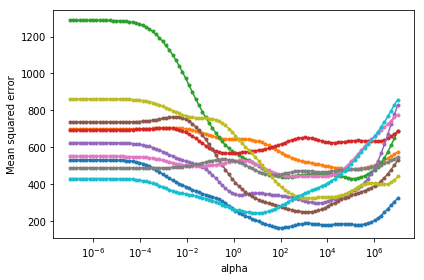

In [24]:
plt.figure(figsize=(6,4))
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

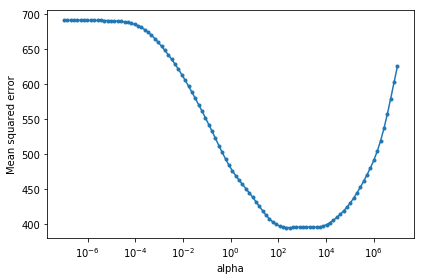

In [27]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv,axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

The optimal $\alpha$ in our CV experiment seems to be slightly above $10^3$, so slightly above 1000, whereas the MSE of the test-set was at slightly above 100, which does not seem to be drastically different, at least not when considering the wider range of $\alpha$'s that were considered here. 

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [28]:
alphas = np.logspace(-7,7,100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

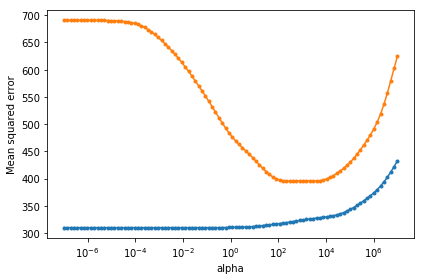

In [29]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv_full,axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv,axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very right:

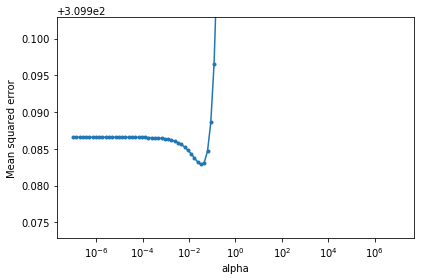

In [30]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv_full,axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full,axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

On the full data, we get an optimal value of slightly below 0.1 (or $10^{-1}$) for $\alpha$, which is much smaller than the 1000 we got on the small training set. This could be because our first training set was very small at 200 observations and thus our model had to be regularized heavily (i.e. $\alpha$ large) in order to make good predictions on our current hold-out set in the cross-validation. When training a model on more data points, the model is not influenced as heavily by single observations and thus does not have to be regularized to make good predictions on the new data in the hold-out set.